# Malus Law

We record data for linearly polarized light to verify Malus Law $I = I_0 cos(\phi)$ where $\phi$ is the angle between Polarizer and Analyser. Then we put a quarter wave plate and see that the plot becomes more uniform, doesnt become exactly flat because the polarizer isnt optimized.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import argrelextrema

In [4]:
drun = pd.read_csv("csvmaluslawfinal - csvmaluslawfinal.csv",usecols= [1,3,37,39,28,30,10,12],header = 0)
k = drun.keys()
drun1 = drun.get([k[0],k[1]]).dropna()
drun6 = drun.get([k[2],k[3]]).dropna()
drun11 = drun.get([k[4],k[5]]).dropna()
drun13 = drun.get([k[6],k[7]]).dropna()

In [5]:
lightrun1 =[float(i) for i in drun1[k[0]][1:]]
posrun1 =[float(i) for i in drun1[k[1]][1:]]
lightrun1.pop(0)
posrun1.pop(0)
# print(posrun1 == list(set(posrun1)))
lightrun1= np.array(lightrun1)
posrun1 = np.array(posrun1)

In [87]:
def cosinesqfit(x,A,B,C):
    return A+ B*(np.cos((x-C)))**2
def cosinefit(x,A,B,C):
    return A+ B*(np.cos(x-C))
def cosinequfit(x,A,B,C):
    return A+ B*(np.cos(x-C))**4
def linearfit(x,A,B):
    return A * x + B
def quadfit(x,A,B):
    return A * x ** 2 + B

In [7]:
param1, cov1 = curve_fit(cosinesqfit,posrun1,lightrun1)
fitcossq = cosinesqfit(posrun1,*param1)
param3,cov3 = curve_fit(cosinequfit,posrun1,lightrun1)
fitcosqu = cosinequfit(posrun1,*param3)


# The Fit results

The cosine square gives us the fit

$y = 1.96147863 + 14.61917806 cos^2(x-8.4986907)$.

$\delta A=0.00709241, \delta B = 0.01305007, \delta C =  0.00042426$

The cosine to the fourth power gives us the fit

$y = 3.93406928 + 14.28921722 cos^2(x-5.35981727)$

$\delta A = 0.04457716, \delta B = 0.09926844, \delta C = 0.00313219$

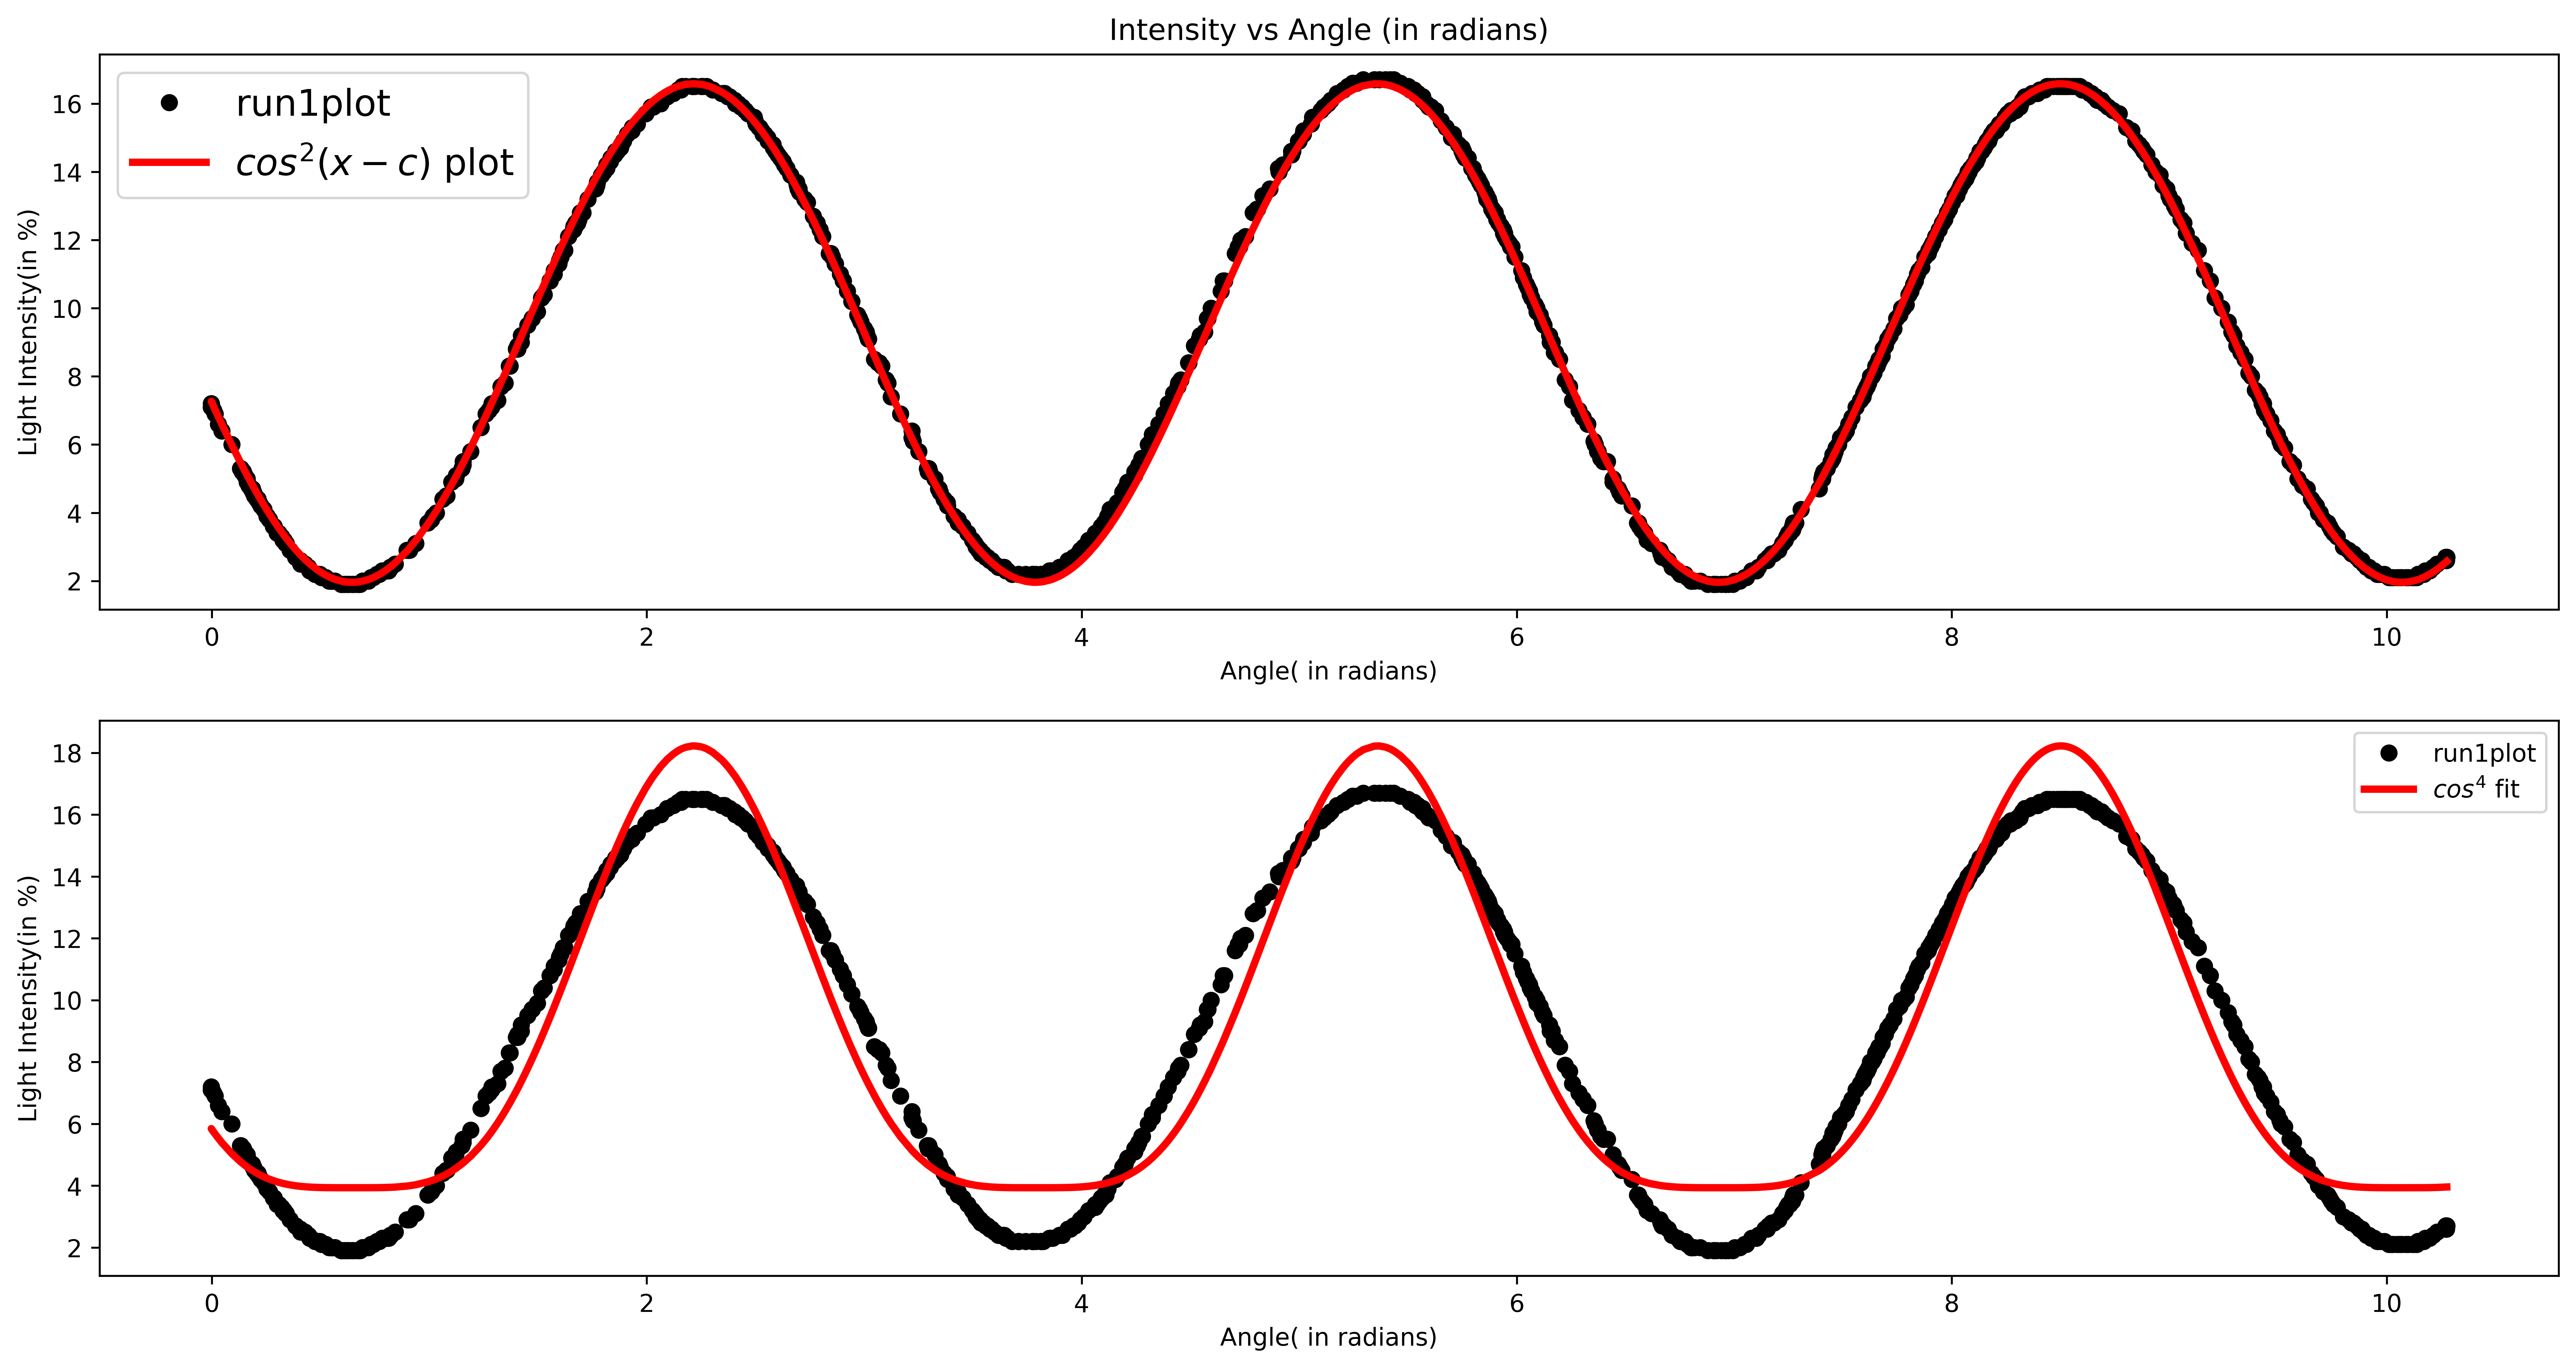

In [107]:
fig,axes = plt.subplots(figsize = (18,9),dpi = 600, nrows =2 , ncols =1)
axes[0].plot(posrun1,lightrun1, 'ko',label = "run1plot")
axes[0].plot(posrun1,fitcossq, 'r' ,lw = 3,label = r"$cos^2(x-c)$ plot")
axes[0].legend(fontsize = 15)
axes[0].set_xlabel(r'Angle( in radians)')
axes[0].set_ylabel(r"Light Intensity(in %)")
axes[0].set_title(r"Intensity vs Angle (in radians)")
axes[1].plot(posrun1,lightrun1, 'ko',label = "run1plot")
axes[1].plot(posrun1,fitcosqu, 'r',lw=3 ,label = r"$cos^4$ fit")
axes[1].legend()
axes[1].set_xlabel(r'Angle( in radians)')
axes[1].set_ylabel(r"Light Intensity(in %)")
fig.savefig("maluslaw1.pdf")

In [10]:
normint = (lightrun1-param1[0])/param1[1]

In [123]:
fig,axes = plt.subplots(figsize = (16,16), dpi = 600,nrows =2 , ncols =1)
fig.suptitle("Intensity vs $cos(x)$ and Intensity vs $cos^2(x)$")
axes[0].plot(np.cos(posrun1),lightrun1, 'k' ,label = r"Intensity vs $cos(x)$ graph")
axes[0].legend(fontsize = 15)
axes[0].set_xlabel(r'Cosine of the Angle')
axes[0].set_ylabel(r"Light Intensity(in %)")

axes[1].plot((np.cos(posrun1))**2,normint, 'r' ,label = r"Intensity vs $cos^2(x)$ graph")
axes[1].legend()
axes[1].set_xlabel(r'Cosine$^2$ of the Angle')
axes[1].set_ylabel(r"Light Intensity(in %)")
fig.savefig("maluslaw2.pdf")


In [125]:
param5, cov5 = curve_fit(quadfit, (np.cos(posrun1-param1[2])), normint)
fitquad = quadfit((np.cos(posrun1-param1[2])),*param5)
param5
param4, cov4 = curve_fit(linearfit,np.cos(posrun1-param1[2])**2,normint)
fitlinear = linearfit(np.cos(posrun1-param1[2])**2,*param4)
param4

array([ 1.00000000e+00, -1.36742617e-10])

In [130]:
fig,axes = plt.subplots(figsize = (16,16), dpi = 600, nrows =2 , ncols =1)
axes[0].plot((np.cos(posrun1-param1[2])),normint, 'ko' ,label = r"Normalized Intensity vs $cos(x-c)$")
axes[0].plot((np.cos(posrun1-param1[2])),fitquad, 'r' , lw = 5, label = r"Normalized Intensity vs $cos(x-c)$ quadratic fit $f(x) = Ax^2$ with $A=1$")
axes[0].legend()
axes[0].set_xlabel(r'$cos(x-C)$')
axes[0].set_ylabel(r"Light Intensity(in %)")
axes[1].plot((np.cos(posrun1-param1[2]))**2,normint, 'ko' ,label = r"Normalized Intensity vs $cos^2(x-c)$")
axes[1].plot((np.cos(posrun1-param1[2]))**2,fitlinear, 'r',lw = 5 ,label = r"Linear $Ax$ fit with A = 1")
axes[1].legend()
axes[1].set_xlabel(r'$cos^2(x-C)$')
axes[1].set_ylabel(r"Light Intensity(in %)")
fig.savefig("maluslaw3.pdf")


Text(0, 0.5, 'Light Intensity(in %)')

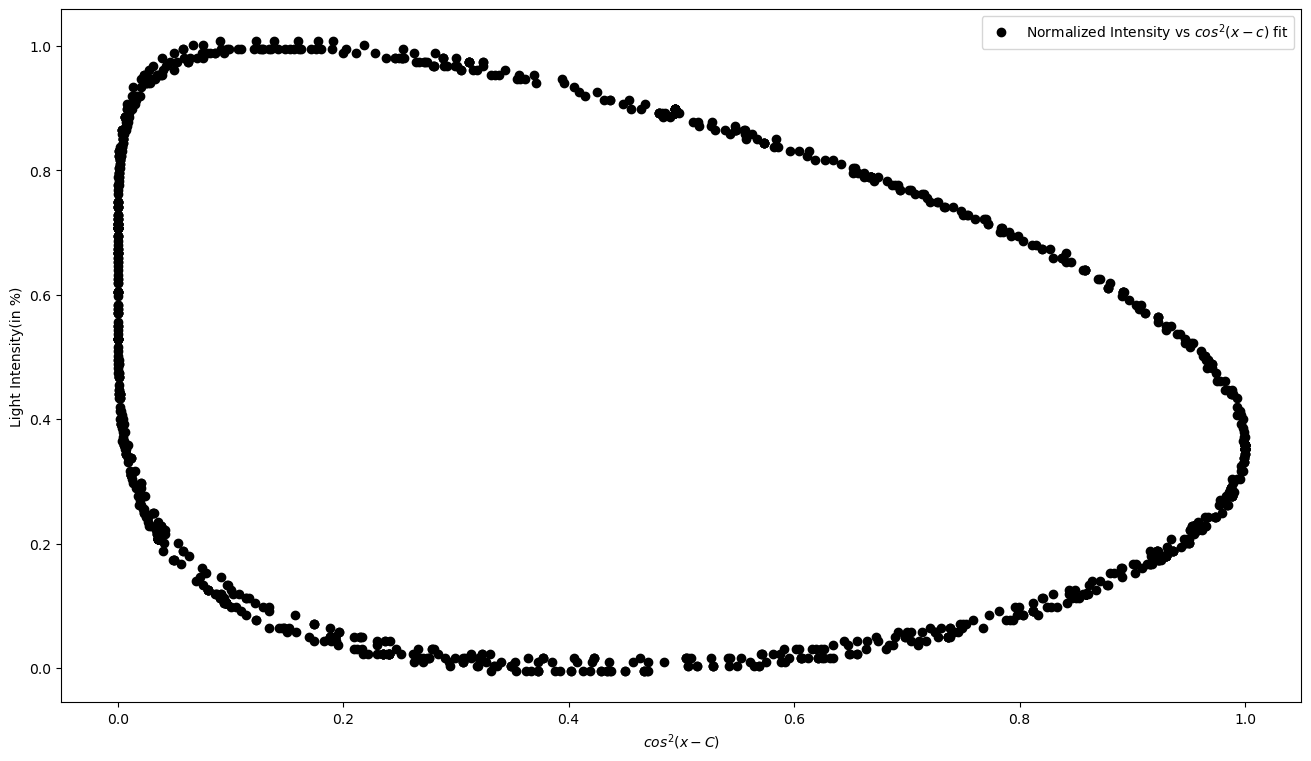

In [14]:
fig,axes = plt.subplots(figsize = (16,9),nrows =1 , ncols =1)
axes.plot((np.cos(posrun1))**4,normint, 'ko' ,label = r"Normalized Intensity vs $cos^2(x-c)$ fit")
axes.legend()
axes.set_xlabel(r'$cos^2(x-C)$')
axes.set_ylabel(r"Light Intensity(in %)")

# Plots after putting Quarter waveplate

In [16]:
retangle =[float(i) for i in drun13[k[7]][1:]]
retint =[float(i) for i in drun13[k[6]][1:]]
leftretangle =[float(i) for i in drun6[k[3]][1:]]
leftretint =[float(i) for i in drun6[k[2]][1:]]
rigtretangle =[float(i) for i in drun11[k[5]][1:]]
rigtretint =[float(i) for i in drun11[k[4]][1:]]
retangle.pop(0)
retint.pop(0)
retint = np.array(retint)
retangle = np.array(retangle)

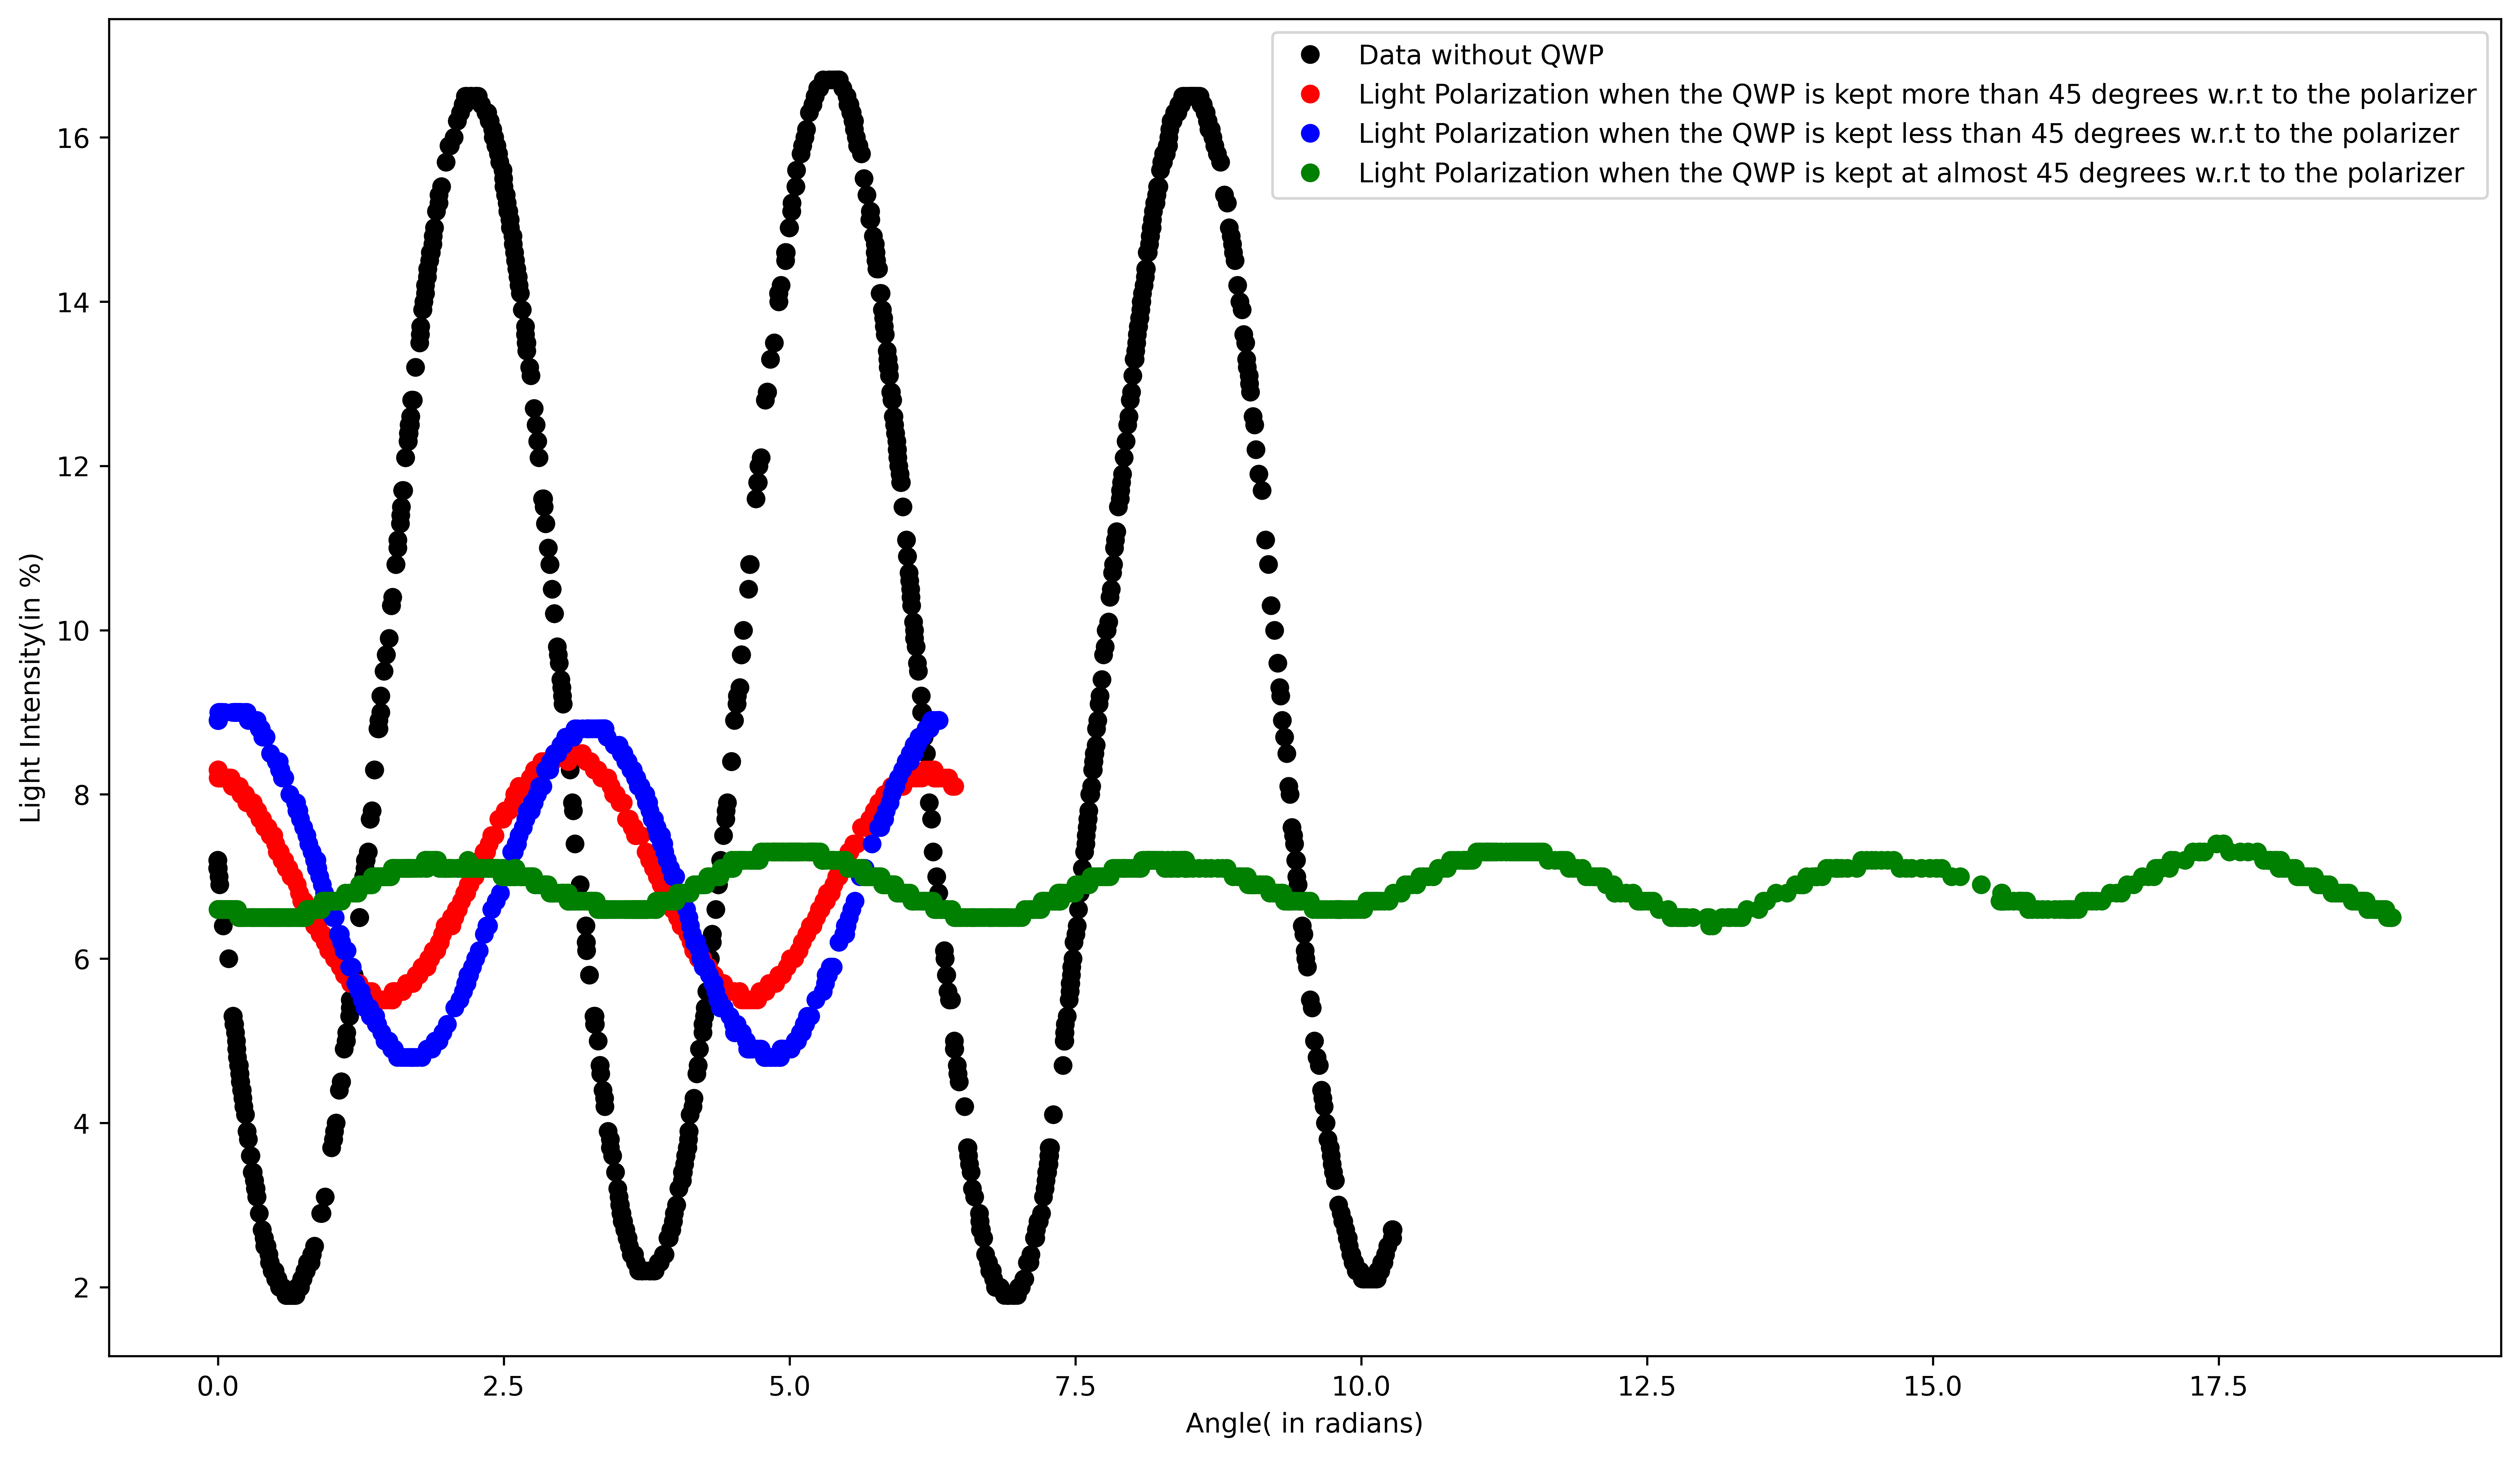

In [134]:
fig,axes = plt.subplots(figsize = (16,9), dpi = 600,nrows =1 , ncols =1)
axes.plot(posrun1,lightrun1, 'ko',label = "Data without QWP")
axes.plot(leftretangle,leftretint, 'ro' ,label = r"Light Polarization when the QWP is kept more than 45 degrees w.r.t to the polarizer")
axes.plot(rigtretangle,rigtretint, 'bo' ,label = r"Light Polarization when the QWP is kept less than 45 degrees w.r.t to the polarizer")
axes.plot(retangle,retint, 'go' ,label = r"Light Polarization when the QWP is kept at almost 45 degrees w.r.t to the polarizer")
axes.legend()
axes.set_xlabel(r'Angle( in radians)')
axes.set_ylabel(r"Light Intensity(in %)")
fig.savefig("maluslaw4.pdf")

In [18]:
paramret, covret = curve_fit(cosinesqfit,retangle,retint)
fitwaveplate = cosinesqfit(retangle,*paramret)
paramret

array([ 7.2349642 , -0.68529726,  0.39419658])

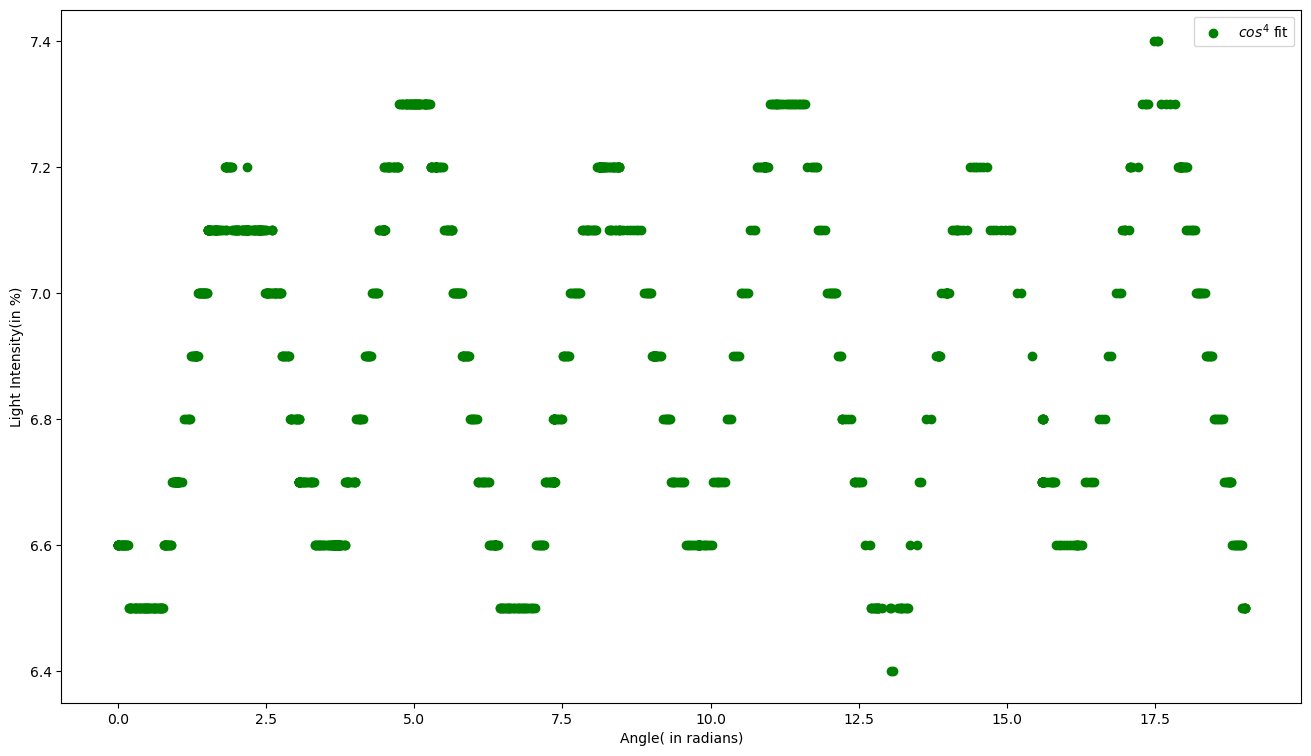

In [103]:
fig,axes = plt.subplots(figsize = (16,9),nrows =1 , ncols =1)
# axes.plot(posrun1,lightrun1, 'ko',label = "run1plot")
# axes.plot(leftretangle,leftretint, 'ro' ,label = r"$cos^4$ fit")
# axes.plot(rigtretangle,rigtretint, 'bo' ,label = r"$cos^4$ fit")
# axes.plot(retangle,fitwaveplate)
axes.plot(retangle,retint, 'go' ,label = r"$cos^4$ fit")
axes.legend()
axes.set_xlabel(r'Angle( in radians)')
axes.set_ylabel(r"Light Intensity(in %)");
# axes.axvline(x=retangle[268])
# axes.axvline(x=retangle[840])
# axes.axvline(x=retangle[450])
# axes.axvline(x=retangle[750])
# axes.axvline(x=retangle[590])
# axes.axvline(x=retangle[990])
# axes.axvline(x=retangle[1050])
# axes.axvline(x=retangle[1130])
# axes.axvline(x=retangle[1175])
# axes.axvline(x=retangle[1238])
# # axes.axvline(x=retangle[1175])



In [85]:
pt = [268,840,450,750,590,990,1050,1130,1174,1238,1175,1238]
pt.sort()
e = np.array([abs(retint[pt[i]]-retint[pt[i+1]]) for i in range(0,len(pt)-4,2)])
e_avg = np.average(e)
print(e)
e_std = np.std(e,ddof = 1)
e_avg,e_std

[0.6 0.8 0.6 0.8]


(0.7000000000000002, 0.11547005383792475)